<br><br><br><br><font color='brown' size=6> Python Project 04<br><br>
Graded Project<br><br>
PART I:<br><br>
EDA & Data Preprocessing on Google App Store Rating Dataset.<br><br>
Domain: Mobile device apps</font>

<font color='black' size=4>Context:
The Play Store apps data has enormous potential to drive app-making businesses to success. However, many
apps are being developed every single day and only a few of them become profitable. It is important for
developers to be able to predict the success of their app and incorporate features which makes an app
successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on
the apps data available for google app store applications. From the collected apps data and user ratings from
the app stores, let's try to extract insightful information.
Objective:
The Goal is to explore the data and pre-process it for future use in any predictive analytics study.
Data set Information:
Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for
category, rating, size, and more.
Attribute Information:
Slno. Attribute Description
1. App:                 Application name
2. Category:            Category the app belongs to.
3. Rating Overall user: rating of the app
4. Size:                Size of the app
5. Installs:            Number of user reviews for the app
6. Type:                Paid or Free
7. Price:               Price of the app
8. Content Rating:      Age group the app is targeted at - children/Mature 21+ /Adult
9. Genres:              An app can belong to multiple genres (apart from its main category). For eg. a musical family game will belong to Music, Game, Family genres.
10. Last Updated Date:  when the app was last updated on play store.
11. Current Ver:        Current version of the app available on play store.
12. Android Ver:        Min required Android Version </font>

<font color='black' size=4>
Analysis to be made:-<br>
1. Import required libraries and read the dataset.<br>
2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.<br>
3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model
building.<br>
4. Check if there are any duplicate records in the dataset? if any drop them.<br>
5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.<br>
6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)<br>
7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.<br>
8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
handle the outliers using a transformation approach.(Hint: Use log transformation)<br>
9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
size='Varies with device')<br>
10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.<br>
11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.<br>
12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis)<br>
13. Encode the categorical columns.<br>
14. Segregate the target and independent features (Hint: Use Rating_category as the target)<br>
15. Split the dataset into train and test.<br>
16. Standardize the data, so that the values are within a particular range.</font>

<p style="text-align: center;"><font color='Purple' size=10 >Analysis</font></p>

<font color='Red' size=5>1. Import required libraries and read the dataset.</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pandas.util.testing as tm


C:\Users\ankit\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Data=pd.read_csv("C:/Users/ankit/Downloads/Apps_data+(1).csv")
Data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


<font color='Red' size=5>2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features</font>

In [3]:
Data.sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5727,Bitdefender Antivirus Free,TOOLS,4.5,78629,6.3M,"1,000,000+",Free,0,Everyone,Tools,"July 20, 2018",3.4.406,4.0.3 and up
3402,Zooper Widget,PERSONALIZATION,4.0,30498,5.9M,"1,000,000+",Free,0,Everyone,Personalization,"March 11, 2015",2.60,3.2 and up
4011,Community by C Space,LIFESTYLE,4.7,707,26M,"5,000+",Free,0,Everyone,Lifestyle,"July 17, 2018",2.2.0,4.4 and up
3919,Real City Car Driver,GAME,3.7,413609,22M,"10,000,000+",Free,0,Mature 17+,Racing,"August 1, 2018",2.8,4.1 and up
3518,The Maner,PRODUCTIVITY,4.2,53015,2.2M,"5,000,000+",Free,0,Everyone,Productivity,"November 12, 2017",2.2.2,2.3 and up
7500,CL Pro App for Craigslist,SHOPPING,4.0,119,1.3M,"10,000+",Free,0,Everyone,Shopping,"July 1, 2017",CL Pro for Craigslist - Canada 150,4.0 and up
8966,DV Youth,LIFESTYLE,5.0,5,15M,100+,Free,0,Everyone,Lifestyle,"April 25, 2016",1.2,4.0.3 and up
3218,Turo - Better Than Car Rental,TRAVEL_AND_LOCAL,4.4,14114,46M,"1,000,000+",Free,0,Everyone,Travel & Local,"August 4, 2018",18.21.0,5.0 and up
674,BBW Dating & Plus Size Chat,DATING,4.4,12633,29M,"1,000,000+",Free,0,Mature 17+,Dating,"July 27, 2018",3.5.0.1,4.1 and up
7625,Foods Co,SHOPPING,4.3,199,25M,"10,000+",Free,0,Everyone,Shopping,"August 2, 2018",14.2.1,5.0 and up


In [4]:
Data.shape


(10841, 13)

In [5]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<font color='Red' size=5>3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.</font>

In [6]:
Data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
Data.describe(include=object).T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


<font color='Red' size=4>List of columns that needed to be worked upon:</font><br>The review column need to be converted to numeric data<br>The size column needs to be imputed with certain data and the irregulatirs of data need to made uniform then converted to numeric<br>also for install data "+" needs to be removed and then coverted to numeric<br>last updated column might be converted to datetime from object<br>hot encoding moght be performed for type column </font>



<font color='Red' size=4>4. Check if there are any duplicate records in the dataset? if any drop them</font>

In [8]:
Data.duplicated().sum()


483

In [9]:
Data.drop_duplicates(inplace=True)
Data.shape

(10358, 13)

In [10]:
Data.duplicated().sum()

0

<font color='Red' size=4>5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.</font>

In [11]:
Data["Category"].nunique()

34

In [12]:
li=pd.DataFrame(Data["Category"].unique(),columns=(["Category"]))
li

,Category
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS
5,COMICS
6,COMMUNICATION
7,DATING
8,EDUCATION
9,ENTERTAINMENT


In [13]:
#we need to remove rows which have category named 1.9
Data[Data["Category"]=="1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
Data.drop(10472,inplace=True)

In [15]:
Data.Category.unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

<font color='Red' size=4>6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)</font>

In [16]:
Data[Data["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [17]:
Data["Rating"].isnull()


0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838     True
10839    False
10840    False
Name: Rating, Length: 10357, dtype: bool

In [18]:
listing=list(Data[Data["Rating"].isnull()].index)

In [19]:
#some other method:
    #1 Data.dropna(subset=Data["Rating"],inplace=True)
    #2 Data[Data["Rating"].notnull]
Data.drop(listing,inplace=True)

In [20]:
Data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2092,Moana Island Life,FAMILY,4.1,15246,78M,"1,000,000+",Free,0,Everyone,Simulation;Action & Adventure,"July 12, 2017",3.2.473.202,4.0 and up
2821,HD Camera,PHOTOGRAPHY,4.3,49680,8.7M,"5,000,000+",Free,0,Everyone,Photography,"July 11, 2018",1.8.5,4.2 and up
1050,Citibanamex Movil,FINANCE,3.6,52306,42M,"5,000,000+",Free,0,Everyone,Finance,"July 27, 2018",20.1.0,5.0 and up
7495,Night Camera Blur Effect,PHOTOGRAPHY,3.6,100,2.5M,"10,000+",Free,0,Everyone,Photography,"August 5, 2018",4.2,4.2 and up
2384,Deep Sleep and Relax Hypnosis,MEDICAL,4.2,4852,34M,"100,000+",Free,0,Everyone,Medical,"October 22, 2013",1.3,2.2 and up


In [21]:
Data.shape

(8892, 13)

In [22]:
Data['Rating_category']=Data["Rating"].apply(lambda x:"high" if x>3.5  else "low")

In [23]:
Data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


<font color='Red' size=4>7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.</font>

In [24]:
Distribution=Data["Rating_category"].value_counts()
Distribution

high    8012
low      880
Name: Rating_category, dtype: int64

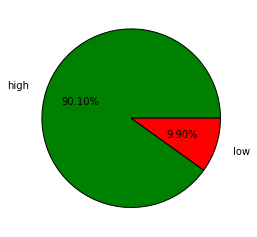

In [25]:
plt.pie(Distribution,colors=["green","red"], autopct="%.2f%%", labeldistance=1.2,labels=Distribution.index)
plt.show()

<font color='Red' size=4>Inference:</font><font color='Black' size=3>The graph shows that 90.10% of feilds in Rating_category column has high rating i.e.,greater  than 3.5.It means most apps have good rating</font>

<font color='Red' size=4>8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)</font>

In [26]:
data=Data.copy()

In [27]:
data.Reviews=pd.to_numeric(data.Reviews,errors="coerce")

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8892 non-null   object 
 1   Category         8892 non-null   object 
 2   Rating           8892 non-null   float64
 3   Reviews          8892 non-null   int64  
 4   Size             8892 non-null   object 
 5   Installs         8892 non-null   object 
 6   Type             8892 non-null   object 
 7   Price            8892 non-null   object 
 8   Content Rating   8892 non-null   object 
 9   Genres           8892 non-null   object 
 10  Last Updated     8892 non-null   object 
 11  Current Ver      8888 non-null   object 
 12  Android Ver      8890 non-null   object 
 13  Rating_category  8892 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [29]:
z=np.abs(zscore(data.Reviews))
z


array([0.16269726, 0.1624191 , 0.13262691, ..., 0.16275061, 0.16271275,
       0.02563588])

In [30]:
threshold=3

In [31]:
data=data[z<threshold]

In [32]:
len(data)

8800

<font color='Red' size=4>9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device'</font>

In [95]:

data.sample(5,random_state=1)

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
553,9000.0,74,666000.0,246000.0,3.65,2431000.0
23,10000.0,46,460000.0,175000.0,1.65,759000.0
41,89000.0,91,8099000.0,5264000.0,0.72,5831000.0
599,5000.0,51,255000.0,41000.0,3.15,803000.0
371,14000.0,56,784000.0,282000.0,1.40,1098000.0


In [34]:
data["Size"]=data["Size"].str.replace("M","e6")
data["Size"]=data["Size"].str.replace("k","e3")

In [35]:
data["Size"]=pd.to_numeric(data["Size"],errors="coerce")

In [36]:
data.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
9375,Fit the Fat 2,SPORTS,3.8,35746,55000000.0,"5,000,000+",Free,0,Everyone,Sports,"December 15, 2017",1.4.3,4.0.3 and up,high
9218,EB Cash Collections,BUSINESS,5.0,1,4300000.0,5+,Free,0,Everyone,Business,"July 31, 2018",1.10,4.4 and up,high


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8800 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8800 non-null   object 
 1   Category         8800 non-null   object 
 2   Rating           8800 non-null   float64
 3   Reviews          8800 non-null   int64  
 4   Size             7377 non-null   float64
 5   Installs         8800 non-null   object 
 6   Type             8800 non-null   object 
 7   Price            8800 non-null   object 
 8   Content Rating   8800 non-null   object 
 9   Genres           8800 non-null   object 
 10  Last Updated     8800 non-null   object 
 11  Current Ver      8796 non-null   object 
 12  Android Ver      8798 non-null   object 
 13  Rating_category  8800 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 1.0+ MB


In [38]:
#Dropping null Entries
data=data[data['Size'].notnull()]
data.shape

(7377, 14)

In [39]:
data.Size.isnull().sum()

0

<font color='Red' size=4>10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type</font>

In [40]:
Data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high


In [41]:
data["Installs"]=data["Installs"].replace({"\\,":"","\\+":""},regex=True)
#data["Installs"]=data["Installs"].str.replace(",","")


In [42]:
data.Installs=pd.to_numeric(data.Installs,errors="coerce")

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7377 non-null   object 
 1   Category         7377 non-null   object 
 2   Rating           7377 non-null   float64
 3   Reviews          7377 non-null   int64  
 4   Size             7377 non-null   float64
 5   Installs         7377 non-null   int64  
 6   Type             7377 non-null   object 
 7   Price            7377 non-null   object 
 8   Content Rating   7377 non-null   object 
 9   Genres           7377 non-null   object 
 10  Last Updated     7377 non-null   object 
 11  Current Ver      7373 non-null   object 
 12  Android Ver      7375 non-null   object 
 13  Rating_category  7377 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 864.5+ KB


<font color='Red' size=4>11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.</font>

In [44]:
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
5536,"Egg, Inc.",FAMILY,4.7,580160,29000000.0,5000000,Free,0,Everyone,Simulation,"June 13, 2018",1.7.5,4.0.3 and up,high
456,All Email Providers,COMMUNICATION,4.1,20901,7300000.0,1000000,Free,0,Everyone,Communication,"April 3, 2018",5.0.9,4.1 and up,high
8305,"CallApp: Caller ID, Blocker & Phone Call Recorder",COMMUNICATION,4.4,483782,20000000.0,10000000,Free,0,Everyone,Communication,"July 29, 2018",1.286,4.1 and up,high
1172,Navy Federal Credit Union,FINANCE,4.4,43313,40000000.0,1000000,Free,0,Everyone,Finance,"July 9, 2018",5.16.2,4.1 and up,high
3951,BIGO LIVE - Live Stream,SOCIAL,4.4,2349421,39000000.0,100000000,Free,0,Teen,Social,"July 27, 2018",4.1.0,4.0 and up,high


In [45]:
data["Price"]=data["Price"].str.replace("$","")

C:\Users\ankit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [46]:
data.Price=pd.to_numeric(data.Price)

In [47]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,7377.000000,7.377000e+03,7.377000e+03,7.377000e+03,7377.000000
mean,4.169324,1.672723e+05,2.245768e+07,6.030197e+06,1.123713
std,0.550834,7.334636e+05,2.312671e+07,3.301883e+07,17.764671
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,9.700000e+01,5.000000e+06,1.000000e+04,0.000000
50%,4.300000,2.014000e+03,1.400000e+07,1.000000e+05,0.000000
75%,4.500000,3.478200e+04,3.200000e+07,1.000000e+06,0.000000
max,5.000000,8.923847e+06,1.000000e+08,1.000000e+09,400.000000


In [48]:
data.Price.dtype

dtype('float64')

<font color='Red' size=4>12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)</font>

In [49]:
column_to_remove=['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver']


In [50]:
data.drop(column_to_remove,axis=1,inplace=True)

In [51]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,87510,8700000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,215644,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,967,2800000.0,100000,Free,0.0,Everyone,high


In [52]:
data.isnull().sum()

Category           0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Rating_category    0
dtype: int64

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7377 non-null   object 
 1   Reviews          7377 non-null   int64  
 2   Size             7377 non-null   float64
 3   Installs         7377 non-null   int64  
 4   Type             7377 non-null   object 
 5   Price            7377 non-null   float64
 6   Content Rating   7377 non-null   object 
 7   Rating_category  7377 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 518.7+ KB


<font color='Red' size=4>13. Encode the categorical columns</font>

In [54]:
data.describe(include=object)

,Category,Type,Content Rating,Rating_category
count,7377,7377,7377,7377
unique,33,2,6,2
top,FAMILY,Free,Everyone,high
freq,1585,6830,5928,6552


In [55]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [56]:
data.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [57]:
data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [58]:

data=pd.get_dummies(data,columns=(["Category","Type","Content Rating"]),drop_first=True)

In [59]:
data["Rating_category"]=data["Rating_category"].apply(lambda x:1 if x=="high" else 0)

In [60]:
data.sample(5)

,Reviews,Size,Installs,Price,Rating_category,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
6330,3,1800000.0,100,0.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4450,29,39000000.0,100,1.99,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
8739,272,785000.0,100000,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
346,659395,11000000.0,100000000,0.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8288,80,8700000.0,5000,0.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
data.Rating_category.value_counts()

1    6552
0     825
Name: Rating_category, dtype: int64

<font color='Red' size=4>14. Segregate the target and independent features (Hint: Use Rating_category as the target)</font>

In [62]:
x=data.drop(["Rating_category"],axis=1)
x

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159,19000000.0,10000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,967,14000000.0,500000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,87510,8700000.0,5000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,215644,25000000.0,50000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,967,2800000.0,100000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,44,619000.0,1000,0.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10834,7,2600000.0,500,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,38,53000000.0,5000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,4,3600000.0,100,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [63]:
y=data["Rating_category"]

<font color='Red' size=4>15. Split the dataset into train and test.</font>

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=23)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5163, 42)
(2214, 42)
(5163,)
(2214,)


<font color='Red' size=4>16. Standardize the data, so that the values are within a particular range.</font>

In [65]:
model=MinMaxScaler()
print(model)

MinMaxScaler()


In [66]:
data2=pd.DataFrame(model.fit_transform(data),columns=data.columns)


In [67]:
data2.head()

,Reviews,Size,Installs,Price,Rating_category,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.000018,0.189931,0.00001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000108,0.139927,0.00050,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.009806,0.086922,0.00500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.024165,0.249936,0.05000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000108,0.027917,0.00010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
